## Regression between cmip6 AMV data and wind influence on sea level change

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/AMV/code')

import import_data as imprt
import regression as regr
import figures as fig

### Regression using only the best models

In [2]:
use_models = 'bestmodels'

### Import and plot wind contribution to sea level data

The annual data has been detrended

In [3]:
df_ac = imprt.import_cmip6_ac_slh_data(use_models = use_models)


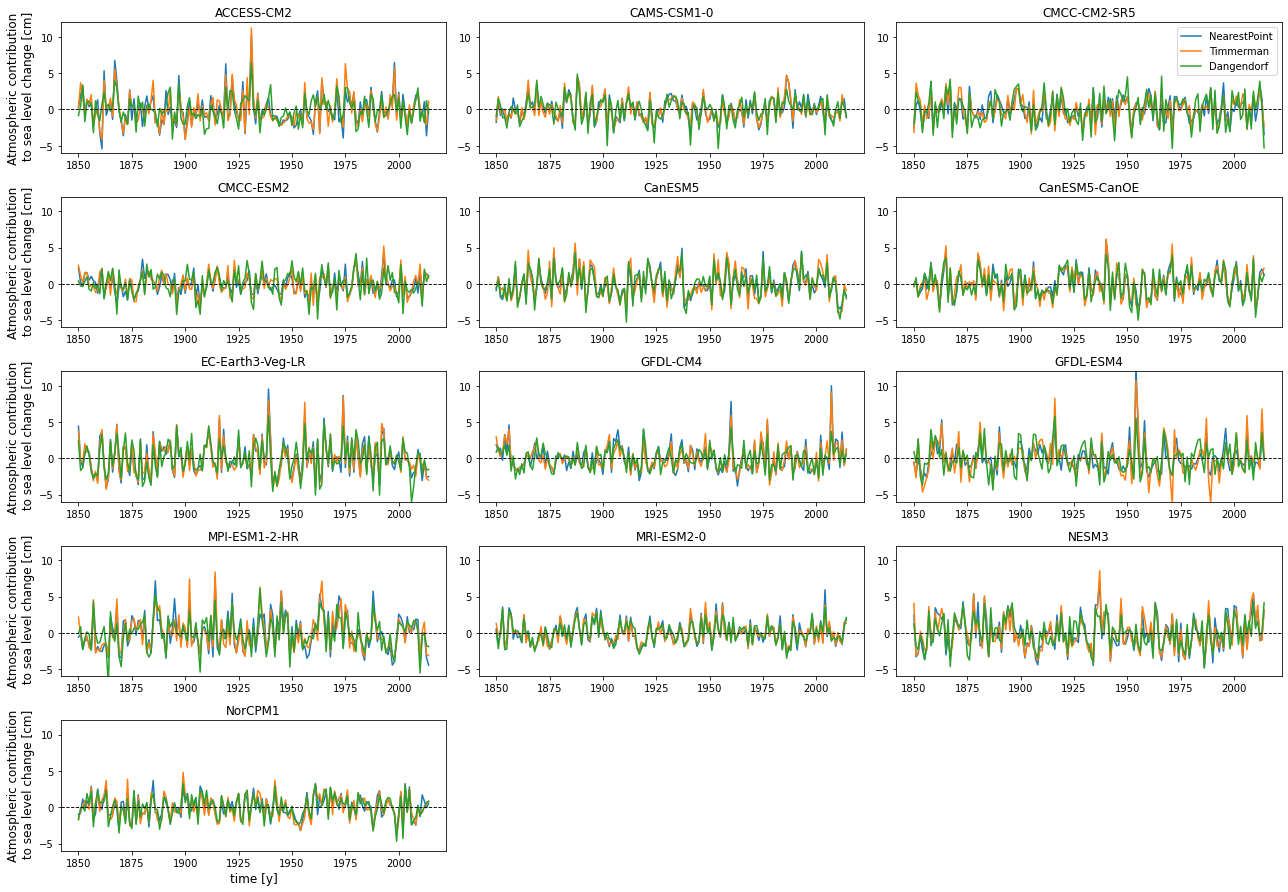

In [4]:
fig.plot_ac_cmip6_timeseries(df_ac, ylabel = 'Atmospheric contribution\n to sea level change [cm]')

### Import and plot AMV data


In [5]:
AMV_data = imprt.import_cmip6_AMV_data(use_models = use_models)

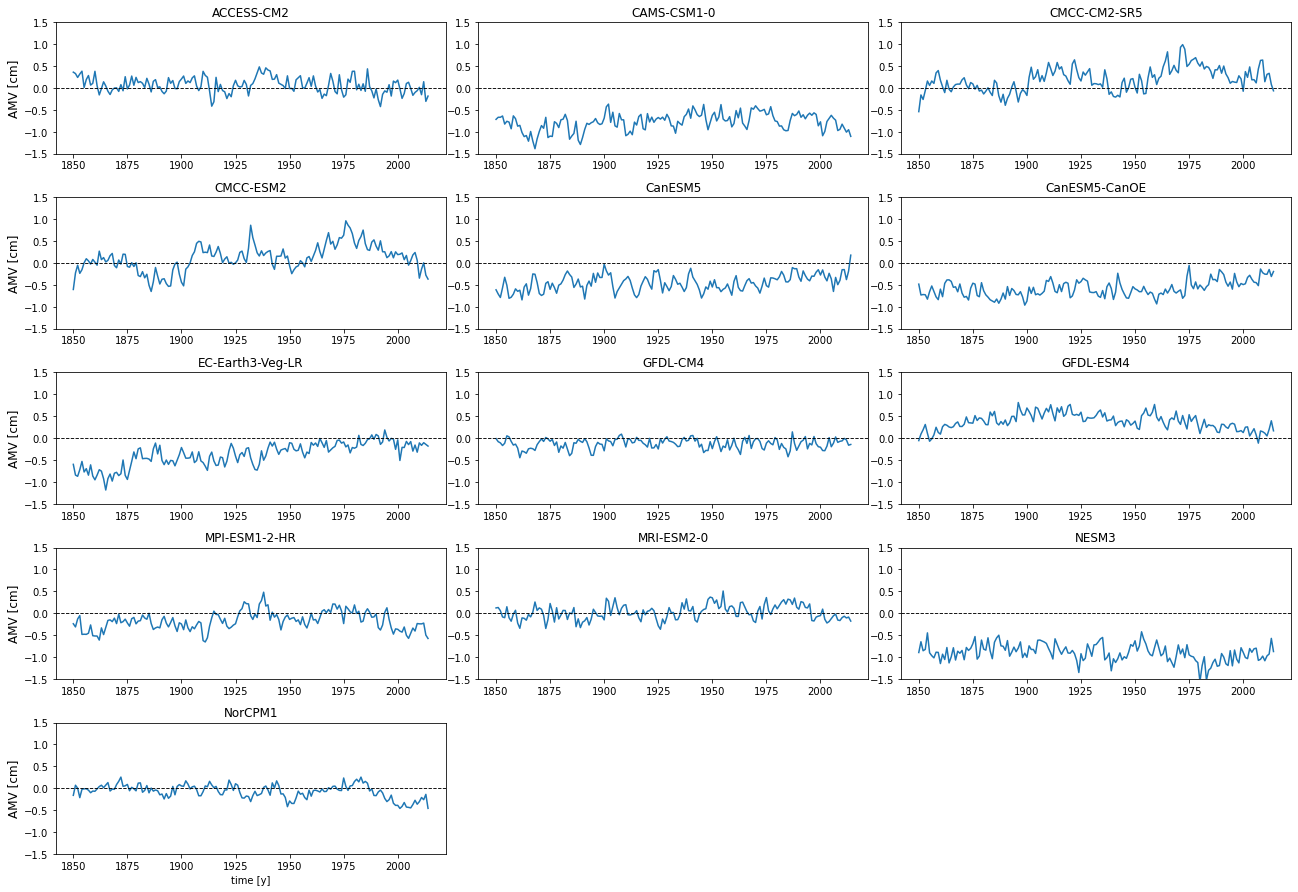

In [6]:
fig.plot_amv_cmip6_timeseries(AMV_data, ylabel = 'AMV [cm]', ymin = -1.5, ymax = 1.5)

### Perform regression for 21y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 21 y window

In [7]:
df_ac_21 = imprt.import_cmip6_ac_slh_data(smoothed = True)
AMV_data_21 = imprt.import_cmip6_AMV_data(smoothed = True)

#### Plot regression input

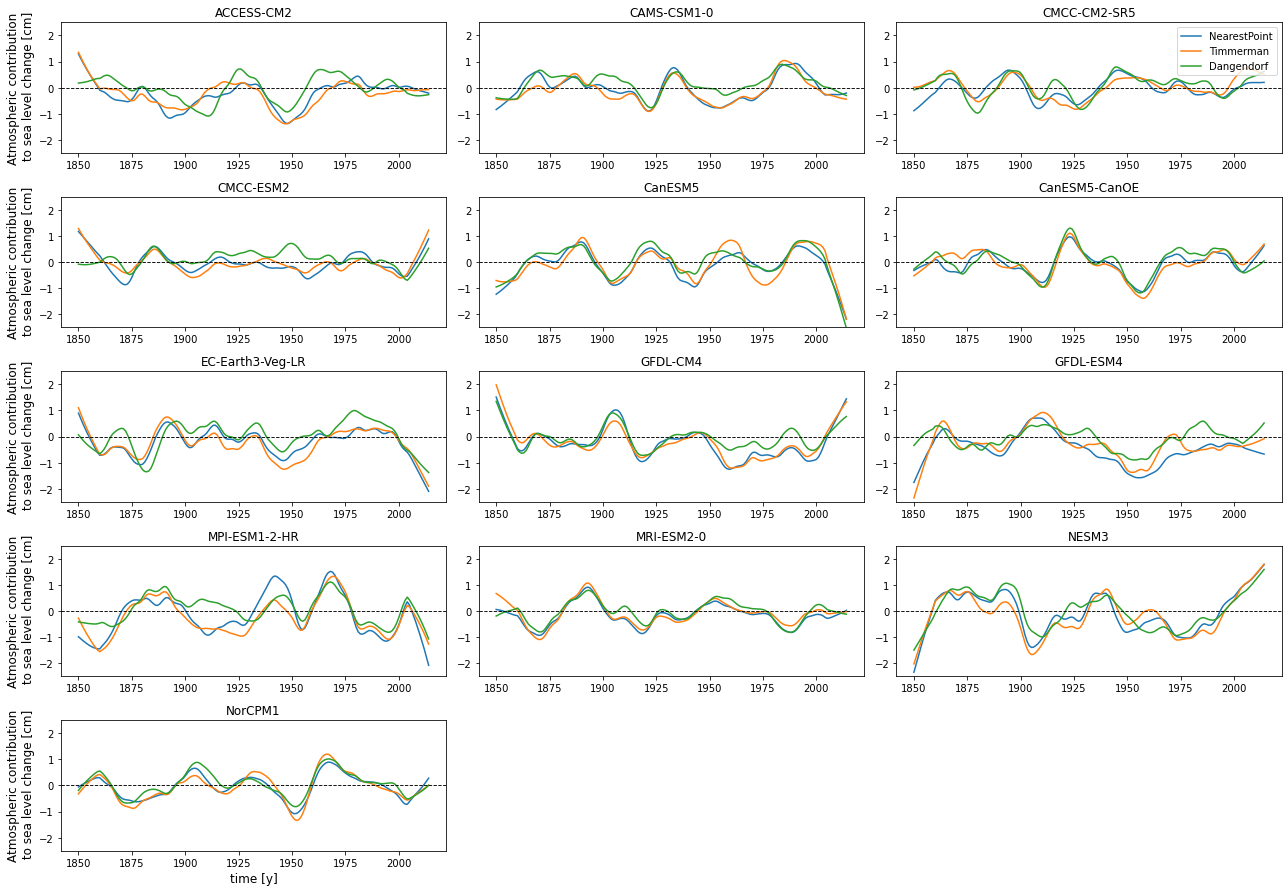

In [8]:
fig.plot_ac_cmip6_timeseries(df_ac_21, ylabel = 'Atmospheric contribution\n to sea level change [cm]', ymin = -2.5, ymax=2.5)


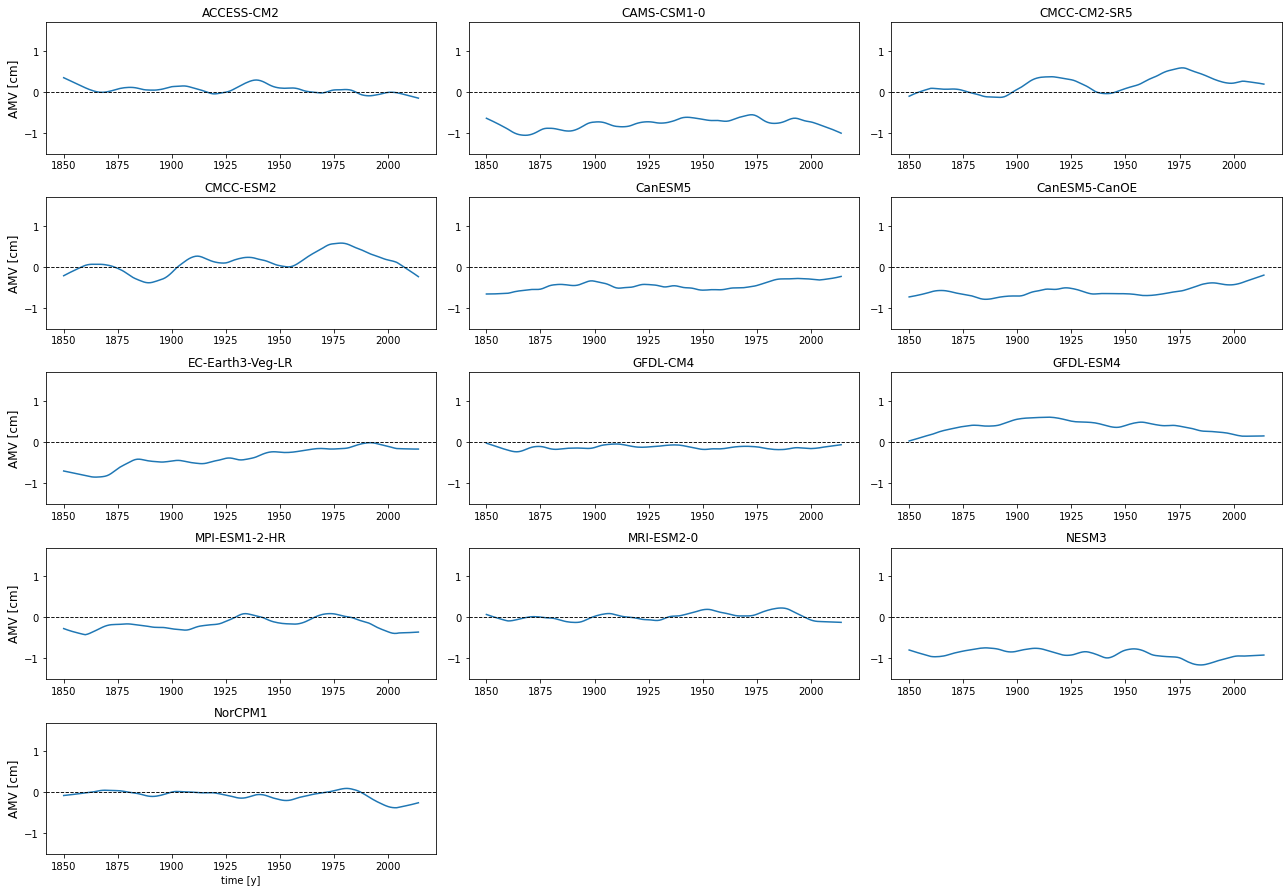

In [9]:
fig.plot_amv_cmip6_timeseries(AMV_data_21, ylabel = 'AMV [cm]', ymin = -1.5, ymax = 1.7)

#### Perform regression

In [10]:
results_21, timeseries_21 = regr.lagged_regression_cmip6(AMV_data_21, df_ac_21)

#### Show regression results

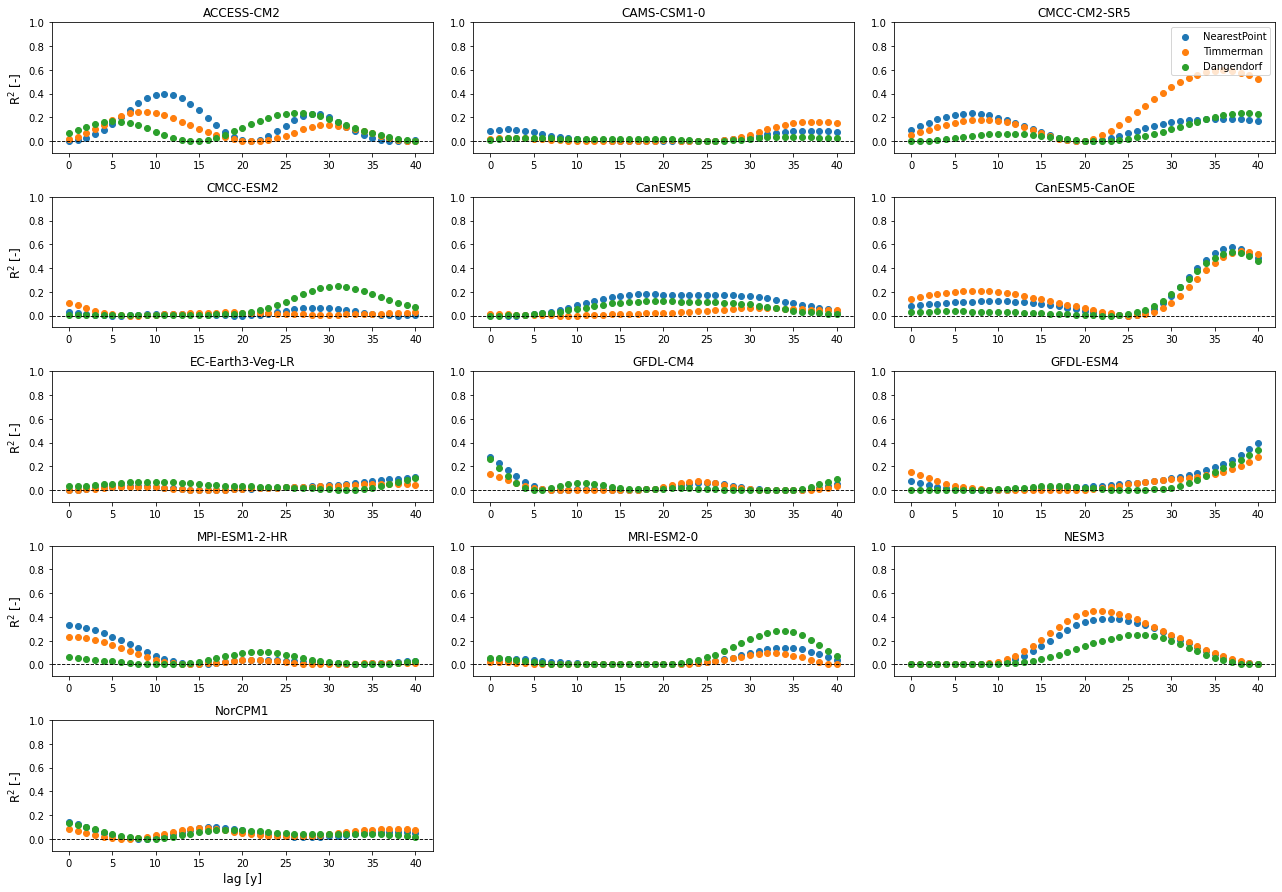

In [11]:
fig.plot_result_cmip6(results_21, 'r$^2$', 'R$^2$ [-]', ymin = -0.1, ymax = 1.0)

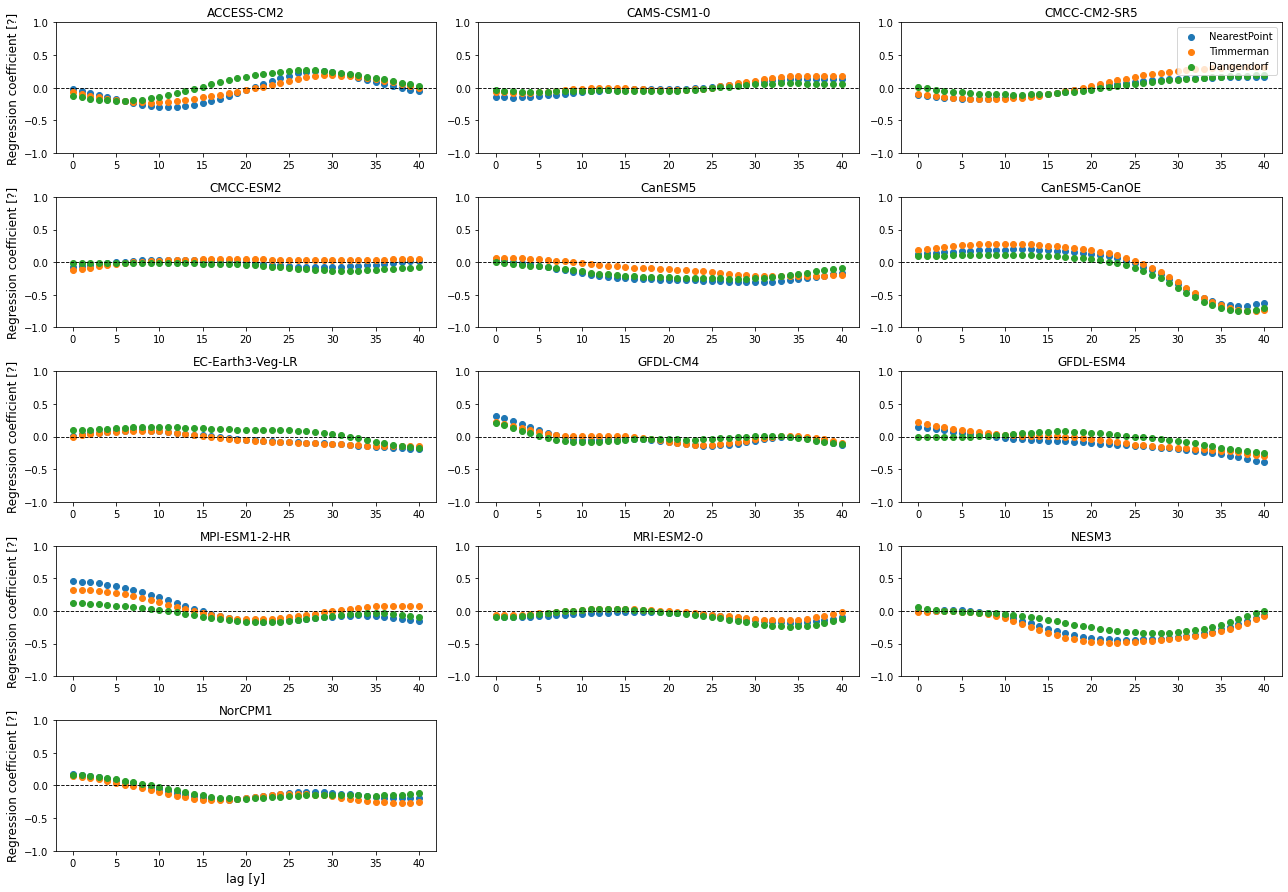

In [12]:
fig.plot_result_cmip6(results_21, 'coef', 'Regression coefficient [?]', ymin = -1, ymax = 1)

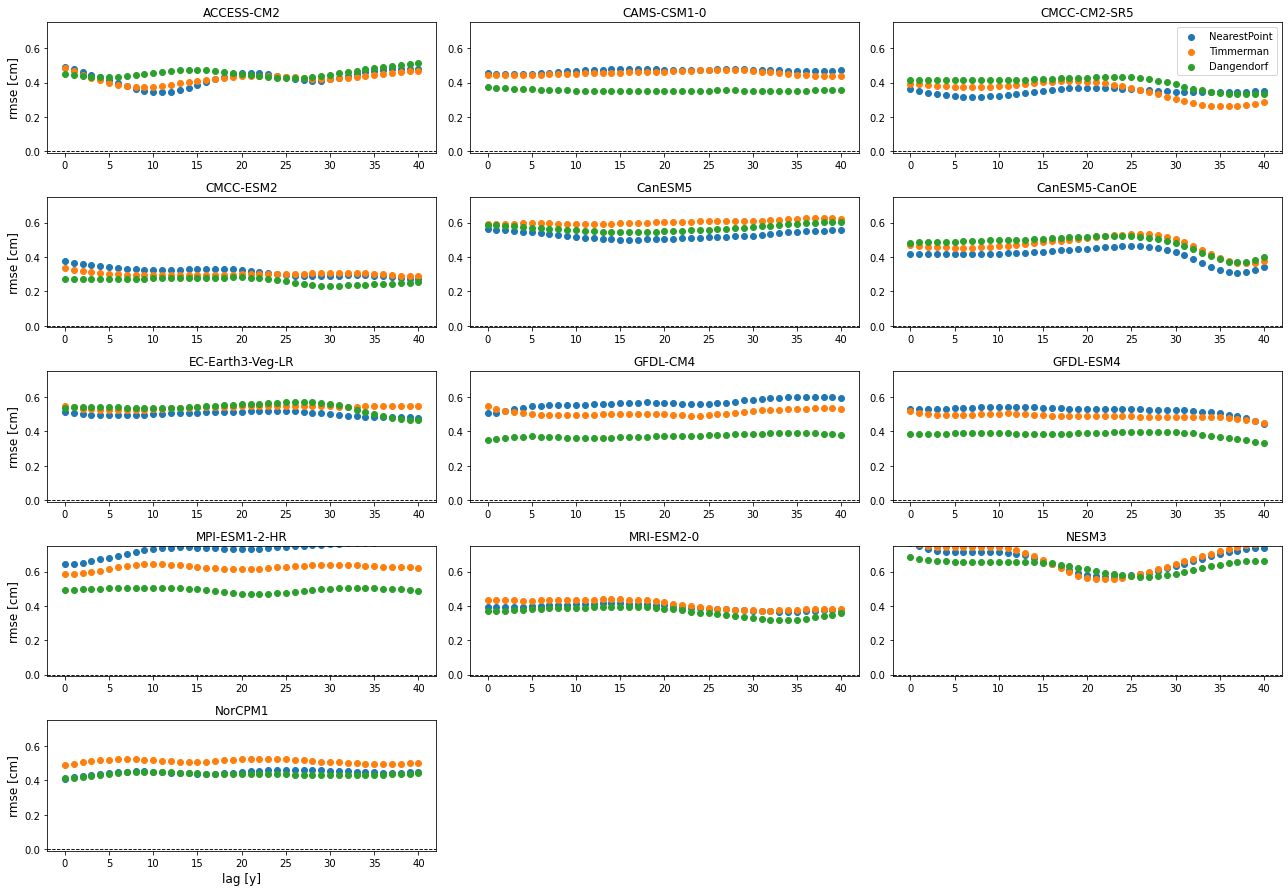

In [13]:
fig.plot_result_cmip6(results_21, 'rmse', 'rmse [cm]', ymin = -0.01, ymax = 0.75)

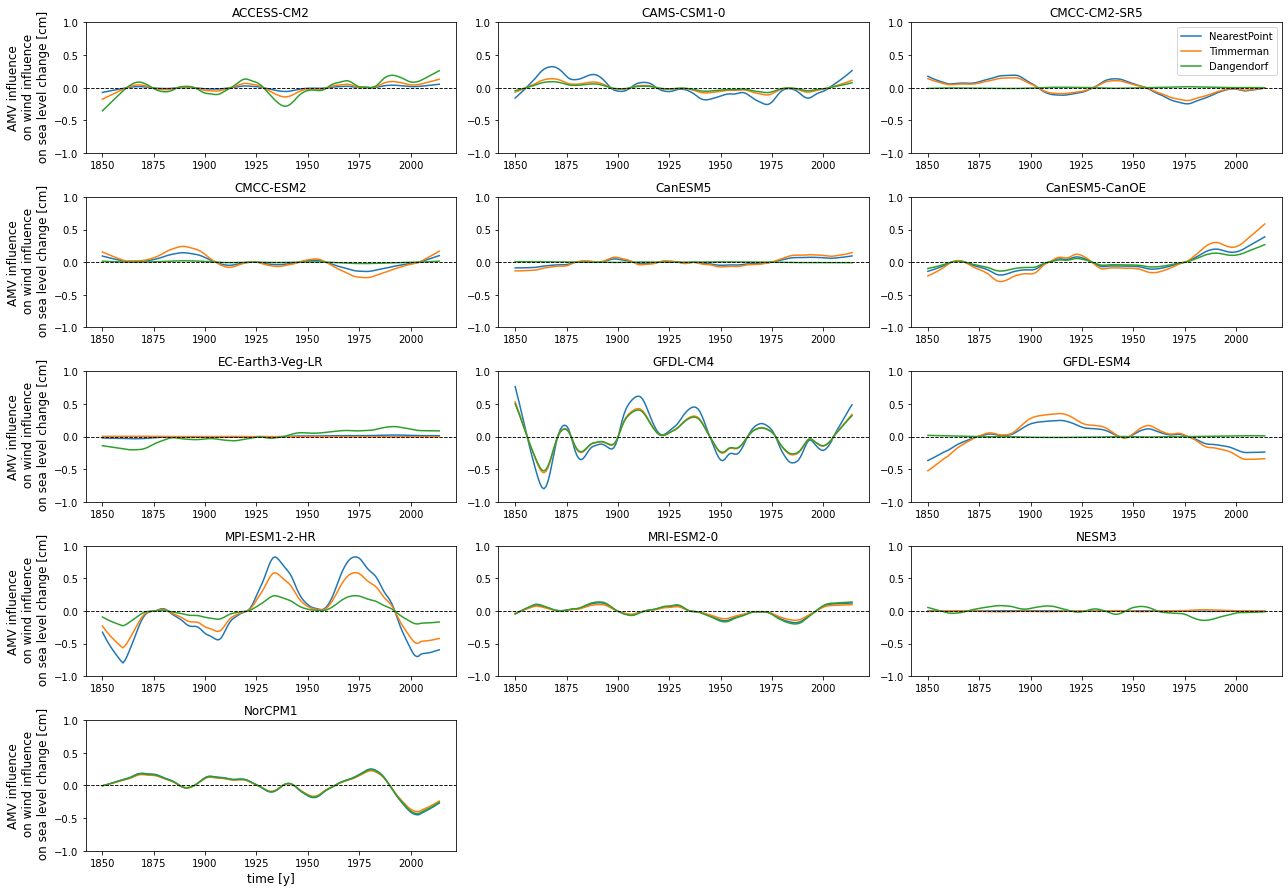

In [14]:
# Plot the AMV contribution to atmospheric influence on sea level change for a specific lag for all models
# LAG 0

fig.plot_timeseries_cmip6_onelag_allmodels(timeseries_21, lag = 0, ymin= -1, ymax = 1)

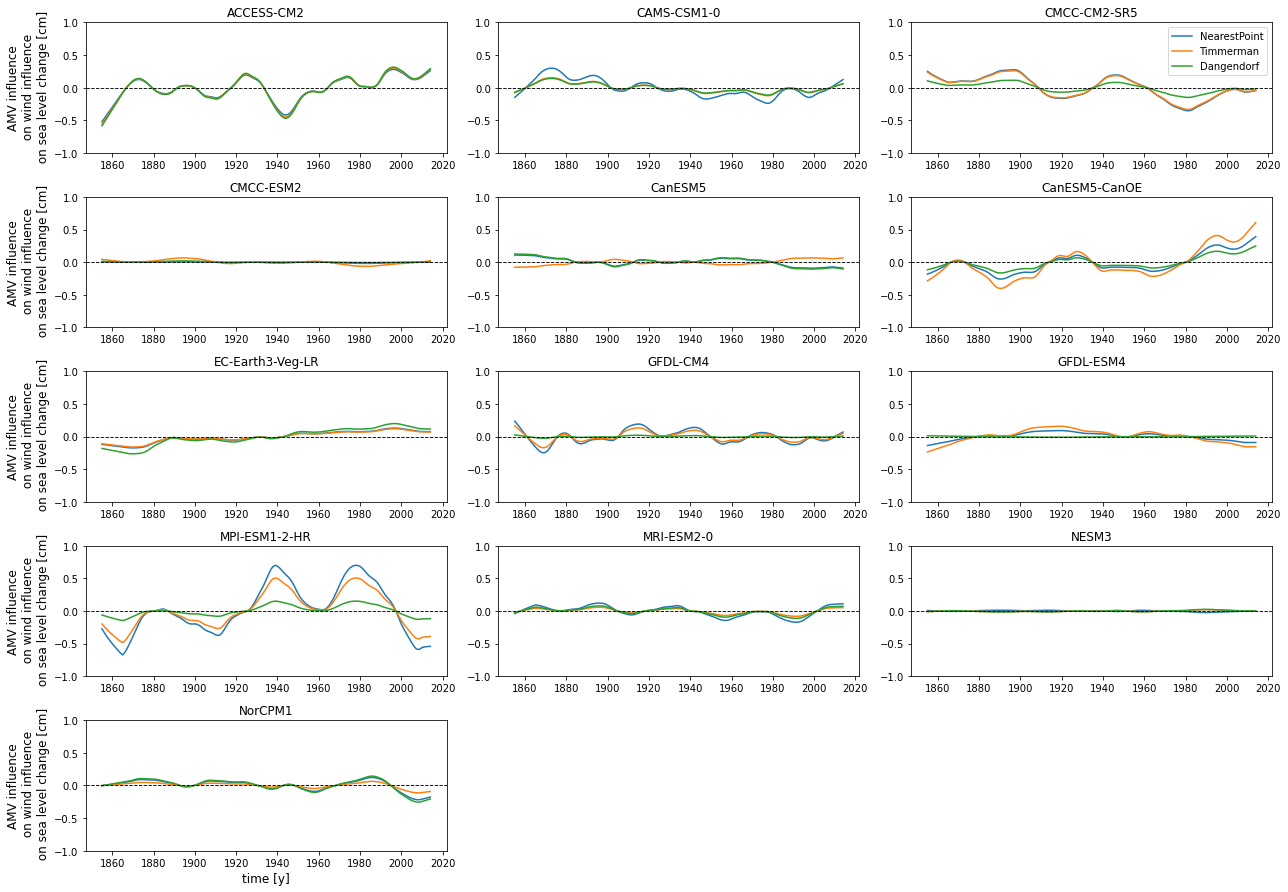

In [15]:
# Plot the AMV contribution to atmospheric influence on sea level change for a specific lag for all models
# LAG 5

fig.plot_timeseries_cmip6_onelag_allmodels(timeseries_21, lag = 5, ymin= -1, ymax = 1)

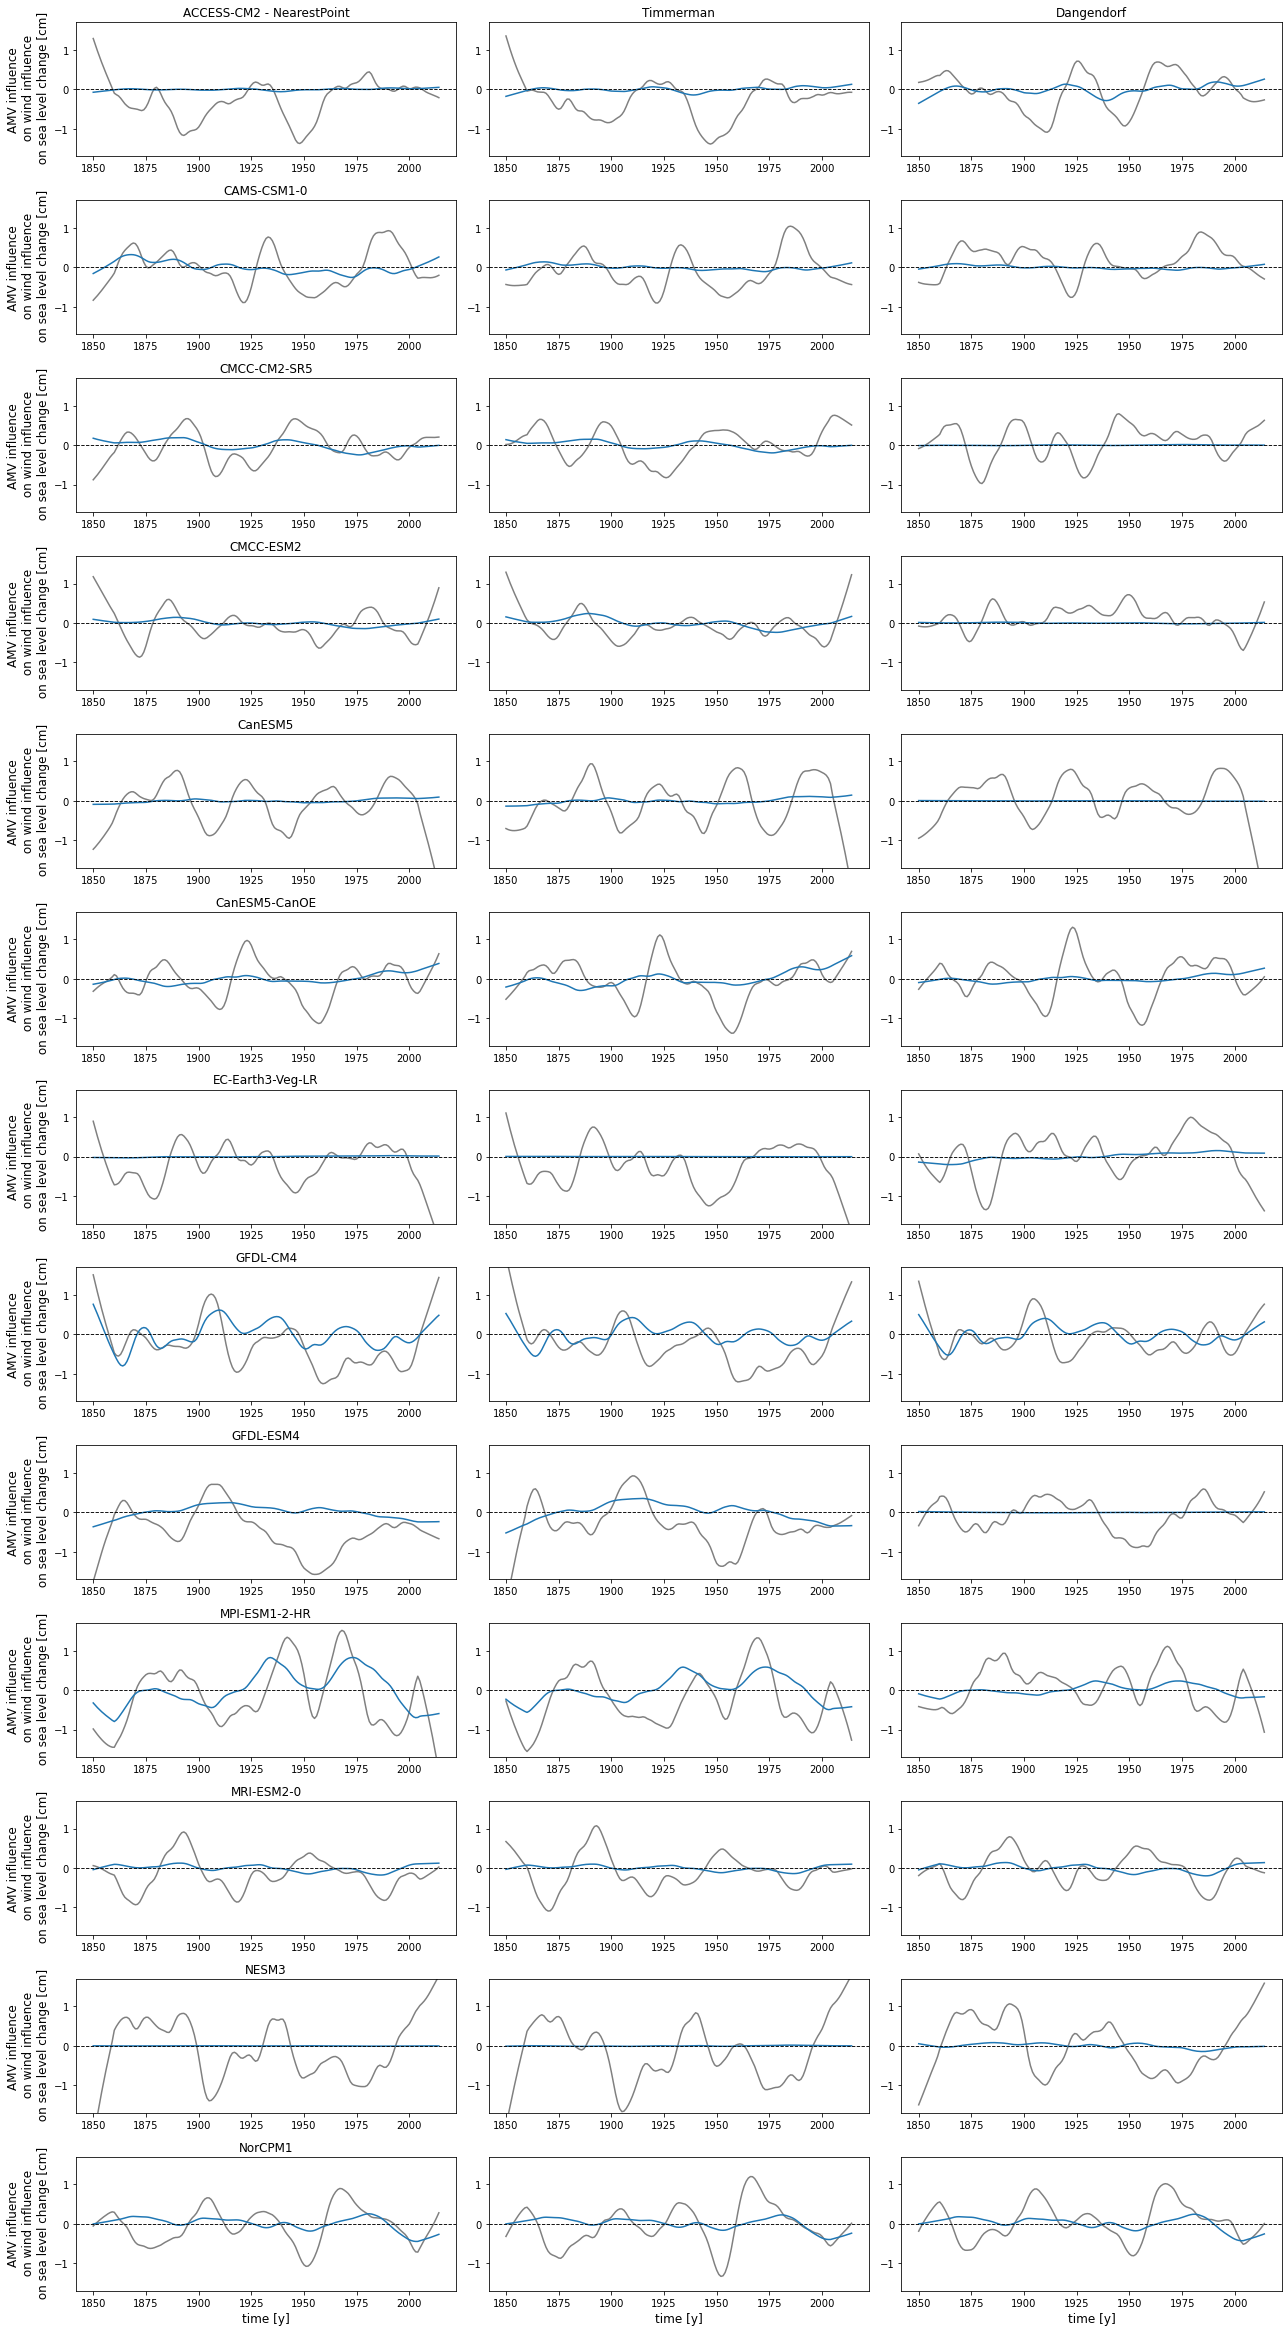

In [16]:
# Plot the AMV contribution to atmospheric influence on sea level change for a specific lag for all models
# LAG 5

fig.plot_timeseries_cmip6_onelag_allmodels_originaldata(timeseries_21, df_ac_21, lag = 0, ymin= -1.7, ymax = 1.7)